# Exploring the MovieLens 1M Dataset

#### Extrated (and slightly modified) from *Python for Data Analysis (Wes McKinney)*

This dataset contains 1 million ratings collected from 6000 users on 4000 movies, and it is organized into three tables:


*   Ratings
*   Users
*   Movie information

Each table is available as a separate file, each containing a series of rows where columns are separated by *::*


[Download the dataset here](http://files.grouplens.org/datasets/movielens/ml-1m.zip)

This example illustrates a series of interesting things that we can learn from this dataset. Most operations will be performed using the pandas library. For more details, please refer to *Python for Data Analysis - page 26*.

## **Code**

Let's begin by importing pandas. It is conventional to use *pd* to denote pandas

In [24]:
import pandas as pd

Next we will import each of the three tables and assign names to each of the columns:

In [32]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python',encoding= 'latin-1')



Let's take a look at the first 5 rows of each table:

In [34]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [36]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [38]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


Having all information spread across different tables makes it much more dificult to analyse the data. Using pandas's merge function, we first merge ratings with users then we merge that result with the movies data. pandas infers which columns to
use as the merge (or join) keys based on overlapping names:

In [40]:
data = pd.merge(pd.merge(ratings, users), movies)

Below is the first row in that dataset

In [42]:
data.head(1)

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama


In this form, aggregating the ratings grouped by one or more user or movie characteristics is straightforward once you build some familiarity with pandas. To get mean movie ratings for each film grouped by gender, we can use the pivot_table method:


In [44]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')

In [46]:
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


If we wish to only look at movies that received more than a certain number of ratings, we can group them as follows (here using 250 ratings):

In [48]:
ratings_by_title = data.groupby('title').size()

In [50]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

Let's now grab the titles of movies that were rated more than 250 times:

In [53]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [55]:
active_titles[:5]

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)',
       '12 Angry Men (1957)'],
      dtype='object', name='title')

The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above:


In [96]:
mean_ratings = mean_ratings.loc[active_titles]

In [98]:
mean_ratings[:5]

gender,F,M,diff
title,,,
"'burbs, The (1989)",2.793478,2.962085,0.168607
10 Things I Hate About You (1999),3.646552,3.311966,-0.334586
101 Dalmatians (1961),3.791444,3.500000,-0.291444
101 Dalmatians (1996),3.240000,2.911215,-0.328785
12 Angry Men (1957),4.184397,4.328421,0.144024


To see the top films among female viewers, we can sort by the F column in descending order:

In [76]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)

In [78]:
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Likewise, for males:

In [81]:
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)

In [83]:
top_male_ratings[:10]

gender,F,M
title,,
"Godfather, The (1972)",4.314700,4.583333
Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954),4.481132,4.576628
"Shawshank Redemption, The (1994)",4.539075,4.560625
Raiders of the Lost Ark (1981),4.332168,4.520597
"Usual Suspects, The (1995)",4.513317,4.518248
Star Wars: Episode IV - A New Hope (1977),4.302937,4.495307
Schindler's List (1993),4.562602,4.491415
"Wrong Trousers, The (1993)",4.588235,4.478261
"Close Shave, A (1995)",4.644444,4.473795


Suppose you wanted to find the movies that are most divisive between male and female viewers. One way is to add a column to *mean_ratings* containing the difference in means, then sort by that:

In [86]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Sorting by 'diff' gives us the movies with the greatest rating difference and which were preferred by women:

In [89]:
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [91]:
sorted_by_diff[:10]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Reversing the order of the rows and again slicing off the top 10 rows, we get the movies preferred by men that women didn’t rate highly:


In [94]:
sorted_by_diff[::-1][:10]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


[10 pts] An aggregate of movie ratings by men of age above 25 for each particular genre,
e.g., Action, Adventure, Drama, Science Fiction, ... Note, Action|Drama|Thriller’ is not
considered a unique genre. The movie that has a genre like this belongs to all three
genres.

In [106]:
male_above_25 = data[(data['gender'] == 'M') & (data['age'] > 25)].copy() 
male_above_25.loc[:, 'genres'] = male_above_25['genres'].str.split('|') 
male_above_25_exploded = male_above_25.explode('genres')

genre_ratings = male_above_25_exploded.groupby('genres')['rating'].mean().reset_index()
genre_ratings = genre_ratings.sort_values(by='rating', ascending=False)
print(genre_ratings)


         genres    rating
9     Film-Noir  4.117140
6   Documentary  3.950192
16          War  3.940634
7         Drama  3.812309
5         Crime  3.764249
12      Mystery  3.759347
2     Animation  3.721569
17      Western  3.708494
11      Musical  3.700242
13      Romance  3.659748
15     Thriller  3.644025
4        Comedy  3.565456
0        Action  3.554547
1     Adventure  3.538637
14       Sci-Fi  3.509693
8       Fantasy  3.490408
3    Children's  3.475314
10       Horror  3.241089


[5 pts] The top 5 ranked movies by the most number of ratings (not the highest rating).

In [112]:
ratings_count = data.groupby('title')['rating'].count().reset_index()

ratings_count = ratings_count.rename(columns={'rating': 'rating_count'})

top_movies_by_ratings = ratings_count.sort_values(by='rating_count', ascending=False)

top_5_movies = top_movies_by_ratings.head(5)

print(top_5_movies)


                                                  title  rating_count
127                              American Beauty (1999)          3428
3153          Star Wars: Episode IV - A New Hope (1977)          2991
3154  Star Wars: Episode V - The Empire Strikes Back...          2990
3155  Star Wars: Episode VI - Return of the Jedi (1983)          2883
1789                               Jurassic Park (1993)          2672


[20 pts]Average movie ratings between users of different age groups (<18, 18-29, 30-49,
50-69, 70 and above>)

In [117]:
bins = [0, 17, 29, 49, 69, float('inf')]
labels = ['<18', '18-29', '30-49', '50-69', '70+']

data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

age_group_ratings = data.groupby('age_group', observed=False)['rating'].mean().reset_index()

print(age_group_ratings)



  age_group    rating
0       <18  3.549520
1     18-29  3.533299
2     30-49  3.624050
3     50-69  3.732677
4       70+       NaN


[25 ]Pick a movie of your choice and for all movies of the same year, provide a
breakdown of the number of unique movies rated by 3 ranges of age of reviewers (a)
under 18 (b) 19 to 45, including 45 (c) Above 45.

In [156]:

movie_title = "Jumanji(1995)"  
movie_year = int(movie_title[-5:-1])  # Extract the year from the title


same_year_movies = data[data['title'].str.contains(f"\\({movie_year}\\)", regex=True)].copy()  # Use .copy() to avoid warnings


same_year_movies['age_group'] = same_year_movies['age_group'].astype('object') if 'age_group' in same_year_movies else None


def categorize_age(age):
    if age <= 18:
        return 'Under 18'
    elif 18 < age <= 45:
        return '19 to 45'
    else:
        return 'Above 45'


same_year_movies['age_group'] = same_year_movies['age'].apply(categorize_age)


unique_movies_count = same_year_movies.groupby('age_group')['title'].nunique().reset_index()
unique_movies_count = unique_movies_count.rename(columns={'title': 'unique_movies_count'})


print(unique_movies_count)




  age_group  unique_movies_count
0  19 to 45                  298
1  Above 45                  263
2  Under 18                  273


[20] A function that takes in a user_id and a movie_id, and returns a list of all
the other movies that the user rated similarly to the given movie, i.e. with the same
rating. Demonstrate that your function works.

In [126]:
def get_similar_rated_movies(user_id, movie_id, data):
   
    user_data = data[data['user_id'] == user_id]
    target_rating = user_data.loc[user_data['movie_id'] == movie_id, 'rating'].iloc[0]
    
   
    similar_movies = user_data[user_data['rating'] == target_rating]['title'].tolist()
    
   
    similar_movies = [movie for movie in similar_movies if movie != data.loc[data['movie_id'] == movie_id, 'title'].iloc[0]]
    
    return similar_movies


user_id_demo = 1  
movie_id_demo = 1193  

similar_movies_demo = get_similar_rated_movies(user_id_demo, movie_id_demo, data)
print(f"Movies rated similarly by user {user_id_demo} to movie ID {movie_id_demo}:")
print(similar_movies_demo)


Movies rated similarly by user 1 to movie ID 1193:
["Bug's Life, A (1998)", 'Ben-Hur (1959)', 'Christmas Story, A (1983)', 'Beauty and the Beast (1991)', 'Sound of Music, The (1965)', 'Awakenings (1990)', 'Back to the Future (1985)', "Schindler's List (1993)", 'Pocahontas (1995)', 'Last Days of Disco, The (1998)', 'Cinderella (1950)', 'Apollo 13 (1995)', 'Toy Story (1995)', 'Rain Man (1988)', 'Mary Poppins (1964)', 'Dumbo (1941)', 'Saving Private Ryan (1998)']


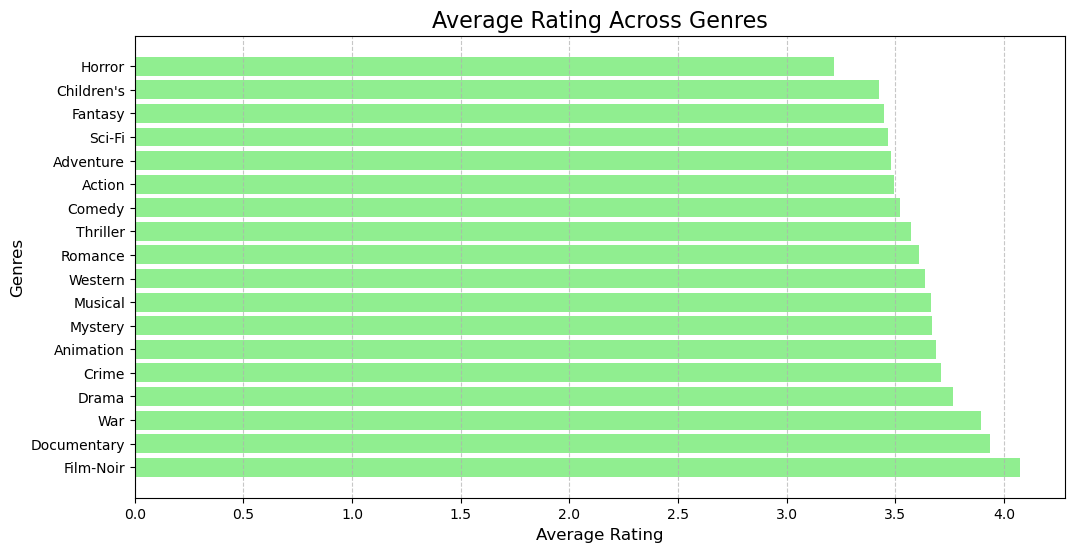

         genres  average_rating  num_movies
9     Film-Noir        4.075188          44
6   Documentary        3.933123         110
16          War        3.893327         141
7         Drama        3.766332        1493
5         Crime        3.708679         201
2     Animation        3.684868         105
12      Mystery        3.668102         104
11      Musical        3.665519         113
17      Western        3.637770          67
13      Romance        3.607465         459
15     Thriller        3.570466         485
4        Comedy        3.522099        1163
0        Action        3.491185         495
1     Adventure        3.477257         281
14       Sci-Fi        3.466521         274
8       Fantasy        3.447371          68
3    Children's        3.422035         250
10       Horror        3.215013         339


In [150]:

import matplotlib.pyplot as plt

data['genres'] = data['genres'].str.split('|')
exploded_data = data.explode('genres')


genre_avg_ratings = exploded_data.groupby('genres').agg(
    average_rating=('rating', 'mean'),
    num_movies=('title', 'nunique')
).reset_index()


genre_avg_ratings = genre_avg_ratings.sort_values(by='average_rating', ascending=False)


plt.figure(figsize=(12, 6))
plt.barh(genre_avg_ratings['genres'], genre_avg_ratings['average_rating'], color='lightgreen')
plt.title("Average Rating Across Genres", fontsize=16)
plt.xlabel("Average Rating", fontsize=12)
plt.ylabel("Genres", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

print(genre_avg_ratings)


1. **High-Rated Genres**:
   - Some genres like "Film-Noir" and "Documentary" tend to have higher average ratings, indicating that these genres are often critically acclaimed or appreciated by niche audiences.

2. **Low-Rated Genres**:
   - Genres such as "Horror" or "Children's" might have lower average ratings, possibly due to polarizing content or appeal to a specific demographic.

3. **Popular vs. High-Rated**:
   - A genre with many movies does not always have a high average rating. For example genre "comedy" has large number of movies yet it's average rating is on the lower side, this means that, volume doesn't equate to quality.

This analysis provides insights into audience preferences across genres and could help in recommending movies based on genre popularity or critical acclaim. 